In [151]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [152]:
features = pd.read_excel("./feature_simplifie.xlsx", engine='openpyxl')
predictions = pd.read_csv("./A_B_C_basicCreep2Boots.csv")

In [153]:
df_merged = pd.merge(features, predictions, left_on="CD_CT_id", right_on="ID")

In [154]:
df_merged.head(10)

,CD_CT_id,CT_tPrime,M_wToBinder,M_silicaFume,CT_sigma_new,Type_x,Unnamed: 0,A,B,C,Type_y,ID,Exp
0,3,60.0,0.5606,0.0,33.465909,CN,913,38.000000,4.561303,23.891431,basic?,3,1
1,3,60.0,0.5606,0.0,33.465909,CN,1035,38.050060,1.367350,0.014498,basic?,3,1
2,3,60.0,0.5606,0.0,33.465909,CN,1036,38.000000,3.315241,6.915602,basic?,3,1
3,3,60.0,0.5606,0.0,33.465909,CN,1037,38.000000,1.532717,0.048416,basic?,3,1
4,3,60.0,0.5606,0.0,33.465909,CN,1038,38.000000,2.973821,4.976426,basic?,3,1
5,3,60.0,0.5606,0.0,33.465909,CN,1039,39.001000,2.372740,1.570164,basic?,3,1
6,3,60.0,0.5606,0.0,33.465909,CN,1040,38.195918,3.821340,11.094582,basic?,3,1
7,3,60.0,0.5606,0.0,33.465909,CN,1041,38.647058,1.522954,0.072662,basic?,3,1
8,3,60.0,0.5606,0.0,33.465909,CN,1042,38.207849,3.694073,10.198196,basic?,3,1
9,3,60.0,0.5606,0.0,33.465909,CN,1043,38.454041,2.451566,1.458514,basic?,3,1


In [155]:
def normalize_column(column):
    min_value = column.min()
    max_value = column.max()
    if max_value - min_value != 0:
        return (column - min_value) / (max_value - min_value)
    else:
        return column

In [156]:
df = df_merged[~df_merged['ID'].isin([104,105,125,126,133,144,147,275,440,442,443,444,502,504,1126,1127,1128,1129,1131,1130,1175,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,334,599,600,604,606])]
df = df.query('Exp == 0')
df = df.drop(['CD_CT_id', 'Unnamed: 0', 'Exp', 'A'], axis=1)

exclude_columns = ['Type_x', 'Type_y', 'B', 'C', "ID"]
columns_to_normalize = [col for col in df.columns if col not in exclude_columns]
df[columns_to_normalize] = df[columns_to_normalize].apply(normalize_column)

df = pd.get_dummies(df, columns=['Type_x', 'Type_y'])

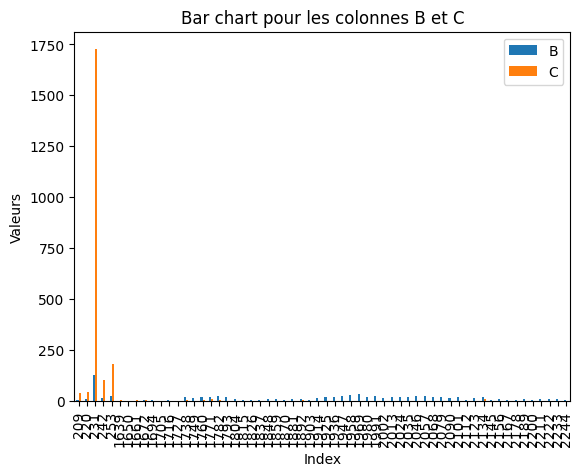

In [157]:
def plotBC():
	df_bc = df[['B', 'C']]
	ax = df_bc.plot.bar()
	ax.set_xlabel('Index')
	ax.set_ylabel('Valeurs')
	ax.set_title('Bar chart pour les colonnes B et C')

plotBC()

In [158]:
Q1 = df['C'].quantile(0.25)
Q3 = df['C'].quantile(0.75)
IQR = Q3 - Q1

# Valeurs aberrantes en dehors de la plage interquartile
outliers = df[(df['C'] < Q1 - 1.5*IQR) | (df['C'] > Q3 + 1.5*IQR)]

In [159]:
outliers

,CT_tPrime,M_wToBinder,M_silicaFume,CT_sigma_new,B,C,ID,Type_x_CN,Type_x_CR,Type_x_CS,Type_y_basic
209,1.000000,0.358032,0.0,0.728473,6.974133,39.959633,289,1,0,0,1
220,1.000000,0.097540,0.0,0.987155,8.626419,47.463277,290,1,0,0,1
231,1.000000,0.300145,0.0,0.737393,128.028839,1725.846092,291,1,0,0,1
242,1.000000,0.097540,0.0,0.903901,14.886438,106.210949,292,1,0,0,1
253,1.000000,0.184370,0.0,0.701713,27.652926,181.577171,293,1,0,0,1
1771,0.222222,0.167004,0.0,0.551855,21.389368,9.300762,1228,1,0,0,1
1782,0.222222,0.167004,0.0,0.509039,25.703833,8.172197,1229,1,0,0,1
2134,0.074074,1.000000,0.0,0.383444,19.332135,10.607774,1290,1,0,0,1


In [160]:
df = df.drop(outliers.index)

In [161]:
Q1 = df['B'].quantile(0.25)
Q3 = df['B'].quantile(0.75)
IQR = Q3 - Q1

# Valeurs aberrantes en dehors de la plage interquartile
outliers = df[(df['B'] < Q1 - 1.5*IQR) | (df['B'] > Q3 + 1.5*IQR)]


In [162]:
outliers

,CT_tPrime,M_wToBinder,M_silicaFume,CT_sigma_new,B,C,ID,Type_x_CN,Type_x_CR,Type_x_CS,Type_y_basic


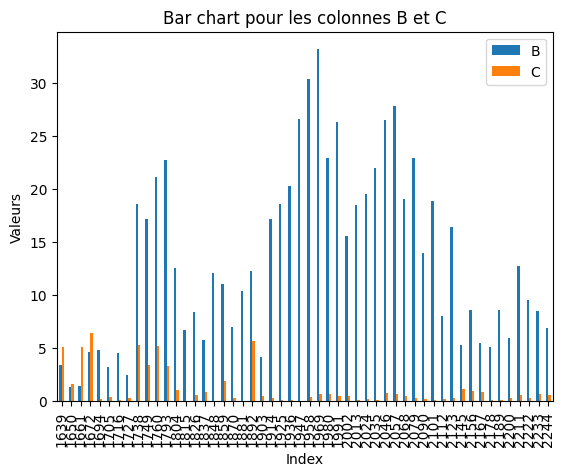

In [163]:
plotBC()

In [164]:
df.shape

(52, 11)

In [165]:
print(max(df['C']))

6.425788767856752


In [166]:
output_columns = ['B', 'C']
X = df.drop(output_columns, axis=1)
y = df[output_columns]

X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)
